# Colorado 13ers Mountain Data Analysis

By: **Austin Jenkins**

Github Repo: https://github.com/ajenkins198621/13ers-machine-learning

In [48]:
# First, I'm going to import all of the libraries that I've used

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import display


## About this project

### Problem to Solve

I would like to analyze the data of the Colorado 13ers to better understand how the heights and prominences of the peaks correspond with their popularity amongs PeakBaggers.

### Motivation

I live in Denver, CO and am a big fan of hiking.  I particularly enjoy hiking the "13ers" here in the state of Colorado.  For those who aren't familiar with the term 13ers, these are peaks that have an elevation between 13,000 and 13,999 feet from sea level.  13ers are generally less popular peaks than the much more famous 14ers (peaks with an elevation of 14,000 feet or higher).  On a personal note, I prefer the 13ers because they are much less crowded and offer the same views/vistas without the hassle of dealing with hoards of people (parking, leaving at 3am, etc).  I've hiked a number of 13ers and have a goal of hiking all of them (well, those that are hikeable and don't require climbing gear) in the state of Colorado. 

#### Some Definitions:
- **Elevation**: The height of a peak above sea level.
- **Prominence**: The height of a peak's summit above the lowest contour line encircling it and no higher summit.  In other words, the prominence of a peak is the height of the peak's summit above the lowest point to which one must descend before re-ascending to a higher summit.  Prominence is a measure of the independence of a peak.  Peaks with low prominence are either subsidiary tops of a higher summit or relatively insignificant independent summits.  Peaks with high prominence are either the highest point of a massif or are considered independent mountains.
- **PeakBaggers**: A term used to describe people who are interested in climbing peaks.  PeakBaggers often have goals of climbing a certain number of peaks, peaks in a certain region, or peaks with certain characteristics.

More about 13ers: https://en.wikipedia.org/wiki/Thirteener

Helpful links:
- Prominence Defintion: http://www.peaklist.org/theory/orometry/article/Orometry_1.html
- 13ers List: https://www.mountainhandbook.com/lists.php?eROC=eR&list=13&list2=Adams&sort=e&form=co
- Hiking 13ers: https://www.climb13ers.com/colorado-13ers/


## The Data: Exploratory Data Analysis

### Source and Structure

I found a list of all the 13ers in Colorado (link below) that contains the below information.  I had to take this data and format it for analysis, so I copied it into a Google sheet which resulted in the columns:
<ol>
    <li><b>Rank:</b> The rank is the list of highest to lowest 13ers peaks in CO.  There was some data in this column that is empty because "ranked" 13ers require 300+ feet of prominence.</li>
    <li><b>Peak:</b> The friendly name of the peak.  Some peaks don't have a friendly name and are just identified by a number, for example "Peak 13402"</li>
    <li><b>Elevation:</b> This is the elevation in feet of the peak's summit.  The original data was formatted as a string in the format "13,787"</li>
    <li><b>Prominence:</b> As the name implies, just the prominence of the peak.</li>
    <li><b>County:</b> The string name of the county in which the peak is geographically located.</li>
    <li><b>Range:</b> There are various ranges (or groups) of mountains in Colorado - this column groups those ranges</li>
    <li><b>Isolation:</b> The isolation of a mountain.  This figure is the distance to the next higher peak.</li>
    <li><b>Ascents:</b> The count of people (PeakBaggers) who have hiked/climbed the peak.  I'll be using this to determine the "popularity" of the peak.</li>
</ol>

#### Data sources:
- https://peakbagger.com/list.aspx?lid=21364

### Initial Data Analysis

Below is some basic initial data information using the pandas library.  I included the head, tail, info and describe methods so we can better examine what needs to be cleaned.

In [49]:
# Here we load the list of data that I created from the Google Sheet and exported to a CSV
df = pd.read_csv('../data/list-of-13ers.csv')
df.head()

,Rank,Peak,Elevation,Prominence,County,Range,Isolation,Ascents
0,1.0,Mount Elbert,"14,438",9078,Lake,Sawatch Range,670.6,2391
1,2.0,Mount Harvard,"14,425",2351,Chaffee,Sawatch Range,14.9,602
2,3.0,Mount Massive,"14,424",1980,Lake,Sawatch Range,5.1,867
3,4.0,Blanca Peak,"14,350",5331,Alamosa/Costilla,Sangre de Cristo Range,103.4,509
4,5.0,La Plata Peak,"14,343",1844,Chaffee,Sawatch Range,6.2,739


In [50]:
df.tail()

,Rank,Peak,Elevation,Prominence,County,Range,Isolation,Ascents
869,626.0,Overlook Point,"13,002",764,La Plata,San Juan Mountains,2.4,8
870,626.0,Peak 12990,"13,002",457,Hinsdale,San Juan Mountains,1.0,11
871,628.0,Peak 12977,"13,001",665,Eagle,Sawatch Range,1.9,4
872,NaN,Peak 13005,"13,001",159,Custer/Saguache,Sangre de Cristo Range,0.5,10
873,NaN,Treasure Mountain,"12,800",224,San Juan,San Juan Mountains,0.9,7


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        628 non-null    float64
 1   Peak        874 non-null    object 
 2   Elevation   874 non-null    object 
 3   Prominence  874 non-null    int64  
 4   County      874 non-null    object 
 5   Range       874 non-null    object 
 6   Isolation   874 non-null    float64
 7   Ascents     874 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 54.8+ KB


In [52]:
df.describe()

,Rank,Prominence,Isolation,Ascents
count,628.000000,874.000000,874.000000,874.000000
mean,314.203822,627.675057,2.970366,77.772311
std,181.363144,692.474964,23.472825,206.198988
min,1.000000,3.000000,0.000000,0.000000
25%,157.750000,285.750000,0.500000,9.000000
50%,314.500000,432.500000,0.900000,18.500000
75%,471.250000,710.500000,1.600000,52.000000
max,628.000000,9078.000000,670.600000,2391.000000


## Data Cleaning

Here's a summary and explanation of the data cleanup I'd like to do to accomplish my ultimate goal of being able to determine the popularity of a peak based on its elevation and prominence.

<ol>
    <li><b>Rank:</b> I don't particularly care about the rank of the peaks and because it is an integer I will drop this column.
    <li><b>Peak:</b> <em>No changes</em></li>
    <li><b>Elevation:</b> There are a couple of changes we need to make for elevation:
        <ul>
            <li>Convert to integer: the elevation is currently a string, so we need to convert it to an integer</li>
            <li>Remove non-13ers: the data includes the 14ers and potentially some 12ers.  We will remove any non-13ers</li>
        </ul>
    <li><b>Prominence:</b> <em>No changes</em></li>
    <li><b>County:</b> <em>No changes</em></li>
    <li><b>Range:</b> <em>No changes</em></li>
    <li><b>Isolation:</b> <em>No changes</em></li>
    <li><b>Ascents:</b> <em>No changes</em></li>
    <li><b>Popularity:</b> This is a new column I am creating with a ranking of "Low", "Medium" and "High" based on the number of ascents.  This will help in conducting a classification problem instead of a regression problem.</li>
</ol>


In [72]:
# Drop the Rank column
if 'Rank' in df.columns:
    df = df.drop(columns='Rank')
if 'Rank' not in df.columns:
    print('Rank column has been dropped')

# Drop the County column
if 'County' in df.columns:
    df = df.drop(columns='County')
if 'County' not in df.columns:
    print('County column has been dropped')

# Clean up the elevation column
df['Elevation'] = df['Elevation'].astype(str).str.replace(r'\D', '', regex=True).astype(int)
if df['Elevation'].dtype == 'int64':
    print('Elevation is now an integer')

# Remove elevations above 14,000 and below 13,000
df = df[(df['Elevation'] >= 13000) & (df['Elevation'] < 14000)]
print('Data only includes 13ers')

bins = [0, df['Ascents'].quantile(0.33), df['Ascents'].quantile(0.66), df['Ascents'].max()]
labels = ['Low', 'Medium', 'High']
df['Popularity'] = pd.cut(df['Ascents'], bins=bins, labels=labels, include_lowest=True)
print(df['Popularity'].value_counts())


print("----------------------")
print("----- TABLE INFO -----")
print(df.info())
df.describe()

Rank column has been dropped
County column has been dropped
Elevation is now an integer
Data only includes 13ers
Popularity
Low       279
High      265
Medium    255
Name: count, dtype: int64
----------------------
----- TABLE INFO -----
<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 74 to 872
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Peak        799 non-null    object  
 1   Elevation   799 non-null    int64   
 2   Prominence  799 non-null    int64   
 3   Range       799 non-null    object  
 4   Isolation   799 non-null    float64 
 5   Ascents     799 non-null    int64   
 6   Popularity  799 non-null    category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 44.6+ KB
None


,Elevation,Prominence,Isolation,Ascents
count,799.000000,799.000000,799.000000,799.000000
mean,13389.735920,548.410513,1.537547,34.023780
std,254.680982,449.092919,2.692125,48.577362
min,13001.000000,3.000000,0.000000,0.000000
25%,13174.000000,289.000000,0.500000,9.000000
50%,13347.000000,424.000000,0.800000,17.000000
75%,13574.500000,656.000000,1.500000,36.500000
max,13995.000000,3623.000000,39.600000,417.000000


#### Data cleaning analysis:

After the data cleanup, 76 rows were removed and according to the info above we can see that we are left with 799 rows.  Note, there are not actually that many 13ers in Colorado, but I will be using this data regardless.  I don't see any obvious duplicates.  However, if through this analysis it is determined that the results are way off, I will likely need to come back and adjust accordingly.  In summary, we now have our columns that we can start doing some more exploratory data analysis and model building.

### Distribution Histograms

The first visualizations I'll take a look at are the distributions of the 13ers acrosss their elevations, class ratings and ranges.  This should help me understand the number of 13ers in each group, whether it be elevations, specific classes or geohraphical ranges.  Whether or not this helps me determine the popularity of a peak is yet to be seen, but it will be interesting to see the distributions of the data (even just for my own enjoyment)

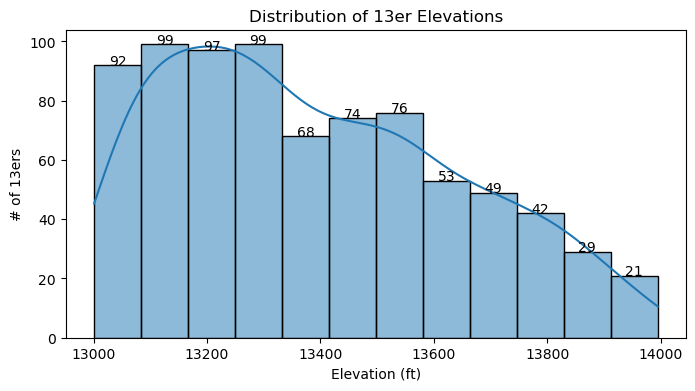

In [54]:
plt.figure(figsize=(8, 4))
graph = sns.histplot(df['Elevation'], kde=True)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}', ha="center")
plt.title('Distribution of 13er Elevations')
plt.xlabel('Elevation (ft)')
plt.ylabel('# of 13ers')
plt.show()

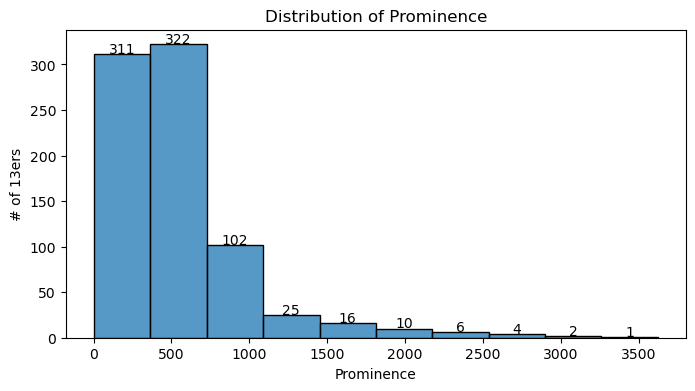

In [55]:
plt.figure(figsize=(8, 4))
graph = sns.histplot(df['Prominence'], bins=10)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2., height + 1, f'{int(height)}', ha="center")

plt.title('Distribution of Prominence')
plt.xlabel('Prominence')
plt.ylabel('# of 13ers')
plt.show()

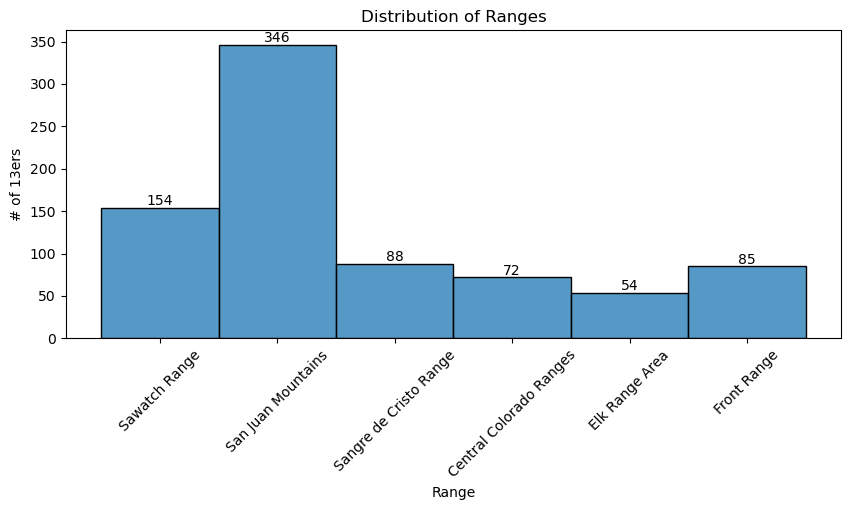

In [56]:
plt.figure(figsize=(10, 4))
graph = sns.histplot(df['Range'])
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2., height + 3, f'{int(height)}', ha="center")

plt.title('Distribution of Ranges')
plt.xlabel('Range')
plt.xticks(rotation=45)
plt.ylabel('# of 13ers')
plt.show()

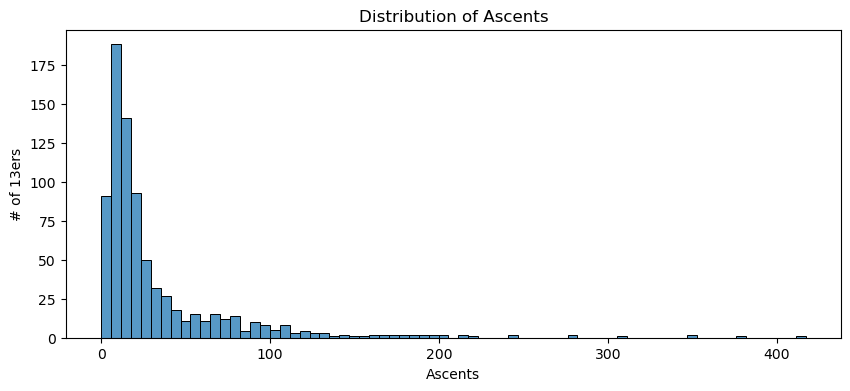

In [57]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Ascents'])
plt.title('Distribution of Ascents')
plt.xlabel('Ascents')
plt.ylabel('# of 13ers')
plt.show()

#### Analysis of Distributions

<ol>
    <li>The first graph shows us that the highest (some pun intended) group of 13ers is the ~13,000 - ~13,300 foot range.  It looks like the count of 13ers gets smaller as the elevation increases.  This makes logical sense as there are only 54 14ers in Colorado.</li>
    <li>In the second graph, it looks like the vast majority of the 13ers have a prominence of 1000 or less.  This tells me that in general many peaks are grouped together.  This makes logical sense as you can often "bag" (hike) multiple nearby 13ers in one outing.</li>
    <li>From the third graph, wow, there are a lot of 13ers in the San Juan range.  As I live in Denver, CO, the closest range to me is the Front range followed by the Elks and Mosquito ranges (the San Juan range is pretty far).  It'll be interesting to see the distribution of the classes and elevations in these ranges.</li>
    <li>The fourth graph shows the distribution of the ascents by peakbaggers.  This info was helpful in determining the popularity groups.</li>
</ol>


### Correlation Matrix


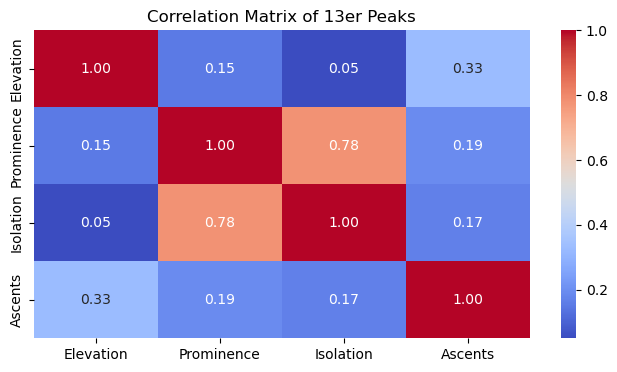

In [58]:
correlation_matrix = df[['Elevation', 'Prominence', 'Isolation', 'Ascents']].corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of 13er Peaks')
plt.show()


#### Analysis of Correlation Matrix

<ul>
    <li> We can see that the elevation is somewhat related to the popularity of a peak because it has a 0.33 correlation with the ascents.  This makes sense because the higher the peak, the more likely it is to be climbed.</li>
    <li>Prominence and Isolation are strongly related to each other with a rating of 0.78, meaning peaks that stand out more from their surroundings tend to be more isolated.</li>
    <li>Surprisingly (at least to me), Prominence and Isolation only weakly 0.05-0.19 influence its popularity, suggesting that climbers might be more motivated by other factors, such as accessibility or the fame of the peak.</li>
</ul>

## The Models

### Goal
As stated previously, my goal is to be able determine the popularity of a peak based on its elevation and prominence.  This will be a <b>classification</b> problem as we'll be looking at the new column created "Popularity" which will be a ranking of "Low", "Medium" and "High" based on the number of ascents.


#### Multicollinearity check (VIF)
From way back in Week 2 of our classes, let's first address the issue of multicollinearity.  Let's check it between 

In [59]:
## EVALUATE COLINEARITY
X_vif = sm.add_constant(X)
vif = pd.DataFrame()
vif['Feature'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif)

      Feature          VIF
0       const  2816.664036
1   Elevation     1.024138
2  Prominence     1.024138


#### VIF Summary
It looks like we have a relatively low value for Elevation and Prominence (woohoo!), which means we should have too many multicollinearity concerns.

### The Logistic Regression Approach

Logistic Regression Accuracy: 0.5
              precision    recall  f1-score   support

        High       0.62      0.65      0.64        55
         Low       0.53      0.69      0.60        58
      Medium       0.15      0.09      0.11        47

    accuracy                           0.50       160
   macro avg       0.43      0.48      0.45       160
weighted avg       0.45      0.50      0.47       160



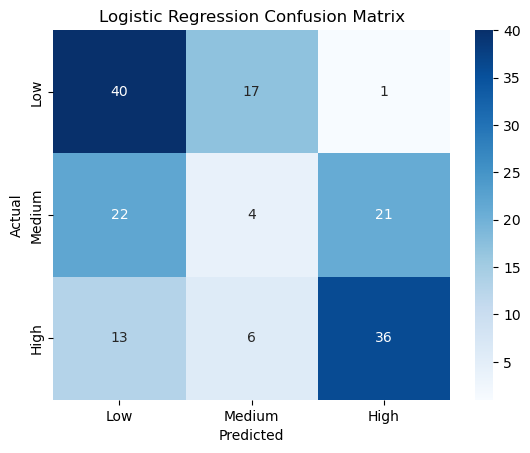

In [75]:
X = df[['Elevation', 'Prominence']]
y = df['Popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

log_reg_v1 = LogisticRegression(max_iter=1000)
log_reg_v1.fit(X_train, y_train)

y_pred = log_reg_v1.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred, labels=['Low', 'Medium', 'High'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

#### Summary of Logistic Regression
<ul>
    <li>It looks like the accuracy of the model is 0.5, or 50%.  So, we're at a coin flip.  That's not as great as I would have liked.  So I'm going to try and run it again without the Medium Value.</li>
    <li>It does a better job of predicting High and Low popularities.</li>
    <li>It does a poor job of predicting Medium popularities.</li>
    <li>From the confusion matrix we can see that the Low and High are predicted well, but the Medium is not.</li>
</ul>

### Test model
Below is a script using Python where you can enter the elevation and prominence to test the model.  This will give you a prediction of the popularity of the peak.

In [78]:

elevation_input = widgets.IntText(
    value=13400,
    description='Elevation:',
    style={'description_width': 'initial'},
    disabled=False
)

prominence_input = widgets.IntText(
    value=500,
    description='Prominence:',
    style={'description_width': 'initial'},
    disabled=False
)

button = widgets.Button(
    description='Predict Popularity',
    button_style='success',
    tooltip='Click to predict popularity',
)

def on_button_click(b):
    input_data = pd.DataFrame([[elevation_input.value, prominence_input.value]], columns=['Elevation', 'Prominence'])
    predicted_popularity = log_reg_v1.predict(input_data)
    print(f"Predicted Popularity: {predicted_popularity[0]}")

button.on_click(on_button_click)

display(elevation_input, prominence_input, button)


IntText(value=13400, description='Elevation:', style=DescriptionStyle(description_width='initial'))

IntText(value=500, description='Prominence:', style=DescriptionStyle(description_width='initial'))

Button(button_style='success', description='Predict Popularity', style=ButtonStyle(), tooltip='Click to predic…

Predicted Popularity: Medium
Predicted Popularity: High
Predicted Popularity: High
Predicted Popularity: Low
Predicted Popularity: Medium


### The Logistic Regression Approach (Version 2 without the Medium Popularity)

Logistic Regression Accuracy: 0.7625
              precision    recall  f1-score   support

        High       0.73      0.73      0.73        71
         Low       0.79      0.79      0.79        89

    accuracy                           0.76       160
   macro avg       0.76      0.76      0.76       160
weighted avg       0.76      0.76      0.76       160



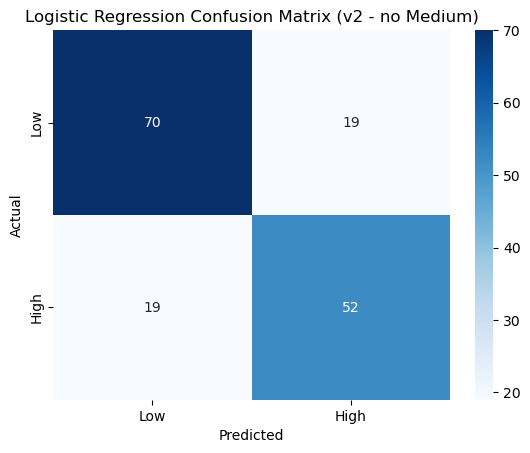

In [81]:
bins = [0, df['Ascents'].median(), df['Ascents'].max()]
labels = ['Low', 'High']
df['Popularity'] = pd.cut(df['Ascents'], bins=bins, labels=labels, include_lowest=True)

X = df[['Elevation', 'Prominence']]
y = df['Popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

log_reg_v2 = LogisticRegression(max_iter=1000)
log_reg_v2.fit(X_train, y_train)

y_pred = log_reg_v2.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred, labels=['Low', 'High'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix (v2 - no Medium)')
plt.show()


In [89]:
def on_button_click(b):
    input_data = pd.DataFrame([[elevation_input.value, prominence_input.value]], columns=['Elevation', 'Prominence'])
    predicted_popularity = log_reg_v2.predict(input_data)
    print(f"Predicted Popularity: {predicted_popularity[0]}")

button.on_click(on_button_click)

display(elevation_input, prominence_input, button)


IntText(value=13400, description='Elevation:', style=DescriptionStyle(description_width='initial'))

IntText(value=500, description='Prominence:', style=DescriptionStyle(description_width='initial'))

Button(button_style='success', description='Predict Popularity', style=ButtonStyle(), tooltip='Click to predic…

Predicted Popularity: Low
Predicted Popularity: High
Predicted Popularity: High
Predicted Popularity: High
Predicted Popularity: High
Predicted Popularity: High
Predicted Popularity: High
Predicted Popularity: High
Predicted Popularity: High
Predicted Popularity: High
Predicted Popularity: High
Predicted Popularity: High
Predicted Popularity: High
Predicted Popularity: High
Predicted Popularity: High
Predicted Popularity: High
Predicted Popularity: High
Predicted Popularity: High
Predicted Popularity: High
Predicted Popularity: High
Predicted Popularity: High


### The Random Forest Classifier Approach

Because we only got a 50% accuracy with the Logistic Regression model, I wanted to try another model and figured the Random Forest Classifier would be a fun choice.

In [82]:
# First, we need to reset the popularity column to the original values
bins = [0, df['Ascents'].quantile(0.33), df['Ascents'].quantile(0.66), df['Ascents'].max()]
labels = ['Low', 'Medium', 'High']
df['Popularity'] = pd.cut(df['Ascents'], bins=bins, labels=labels, include_lowest=True)
print(df['Popularity'].value_counts())

Popularity
Low       279
High      265
Medium    255
Name: count, dtype: int64


Random Forest Accuracy: 0.6625
              precision    recall  f1-score   support

        High       0.60      0.69      0.64        71
         Low       0.72      0.64      0.68        89

    accuracy                           0.66       160
   macro avg       0.66      0.67      0.66       160
weighted avg       0.67      0.66      0.66       160



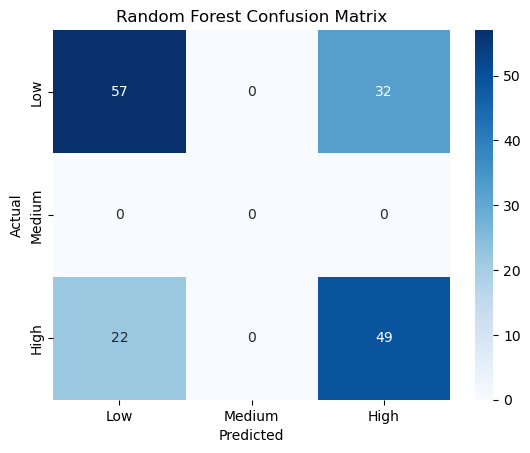

In [90]:
X = df[['Elevation', 'Prominence']]
y = df['Popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

random_forest_clf_v1 = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_clf_v1.fit(X_train, y_train)

y_pred_rf = random_forest_clf_v1.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_mat_rf = confusion_matrix(y_test, y_pred_rf, labels=['Low', 'Medium', 'High'])
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()



In [91]:
def on_button_click(b):
    input_data = pd.DataFrame([[elevation_input.value, prominence_input.value]], columns=['Elevation', 'Prominence'])
    predicted_popularity = random_forest_clf_v1.predict(input_data)
    print(f"Predicted Popularity: {predicted_popularity[0]}")

button.on_click(on_button_click)
display(elevation_input, prominence_input, button)

IntText(value=13400, description='Elevation:', style=DescriptionStyle(description_width='initial'))

IntText(value=500, description='Prominence:', style=DescriptionStyle(description_width='initial'))

Button(button_style='success', description='Predict Popularity', style=ButtonStyle(), tooltip='Click to predic…

#### Random Forest Classifier Summary

On the first run of the Random Forest Classifier, we actually got a worse accuracy than the Logistic Regression model.  I was surprised by this, but I think it's because the Random Forest Classifier is overfitting the data.  I'll need to tune the hyperparameters to get a better result.  It looks like the initial accuracy is a measly 48%.

### The Random Forest Classifier (Version 2 with hyperparameter tuning)

            Importance
Elevation     0.556183
Prominence    0.443817
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV]

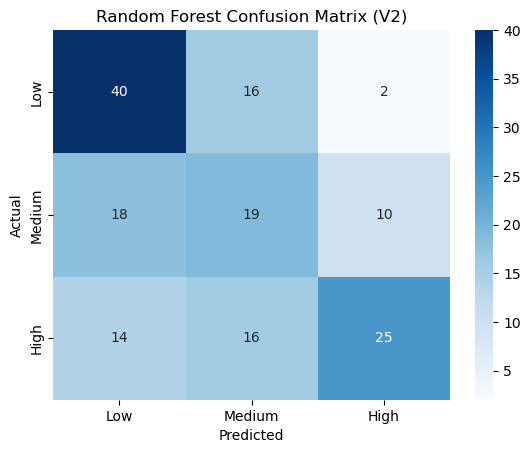

In [84]:
X = df[['Elevation', 'Prominence']]
y = df['Popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

feature_importances = pd.DataFrame(random_forest_clf_v1.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

print(feature_importances)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=random_forest_clf_v1, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
random_forest_clf_v2 = grid_search.best_estimator_
y_pred_best_rf = random_forest_clf_v2.predict(X_test)
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))

# Confusion Matrix
conf_mat_rf = confusion_matrix(y_test, y_pred_best_rf, labels=['Low', 'Medium', 'High'])
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix (V2)')
plt.show()


#### Random Forest Classifier Summary V2

After tuning the hyperparameters, we were able to get a somewhat better accuracy of 52.5%.  This is a bit of an improvement and goes to show how you can enhance your models using some of these features.

### The Random Forest Classifier (Version 3 with hyperparameter tuning & no medium popularity)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, 

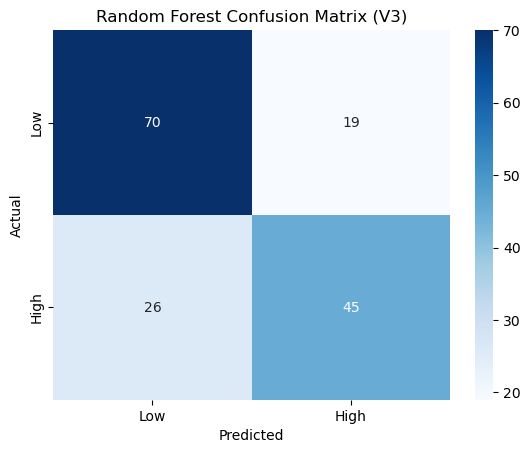

In [85]:
bins = [0, df['Ascents'].median(), df['Ascents'].max()]
labels = ['Low', 'High']
df['Popularity'] = pd.cut(df['Ascents'], bins=bins, labels=labels, include_lowest=True)

X = df[['Elevation', 'Prominence']]
y = df['Popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

feature_importances = pd.DataFrame(rf_clf.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Best parameters and accuracy
best_rf_clf = grid_search.best_estimator_
y_pred_best_rf = best_rf_clf.predict(X_test)
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))

# Confusion Matrix
conf_mat_rf = confusion_matrix(y_test, y_pred_best_rf, labels=['Low', 'High'])
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix (V3)')
plt.show()


In [86]:
### Interactive Widget for Random Forest Prediction

elevation_input = widgets.IntText(
    value=13400,
    description='Elevation:',
    style={'description_width': 'initial'},
    disabled=False
)

prominence_input = widgets.IntText(
    value=500,
    description='Prominence:',
    style={'description_width': 'initial'},
    disabled=False
)

button = widgets.Button(
    description='Predict Popularity',
    button_style='success',
    tooltip='Click to predict popularity',
)

def on_button_click(b):
    input_data = pd.DataFrame([[elevation_input.value, prominence_input.value]], columns=['Elevation', 'Prominence'])
    predicted_popularity = log_reg.predict(input_data)
    print(f"Predicted Popularity: {predicted_popularity[0]}")

button.on_click(on_button_click)

display(elevation_input, prominence_input, button)


IntText(value=13400, description='Elevation:', style=DescriptionStyle(description_width='initial'))

IntText(value=500, description='Prominence:', style=DescriptionStyle(description_width='initial'))

Button(button_style='success', description='Predict Popularity', style=ButtonStyle(), tooltip='Click to predic…

## Results & Analysis

### Summary of Results
<ul>
    <li><b>Objective</b>: Predict the popularity category of a peak based on its elevation and prominence.  To get the popularity of a peak based on its elevation and prominence.</li>
    <li><b>Models</b>: As a recap I used the Linear Regression and Random Forest Classifier models</li>
    <li><b>Results</b>: Both of the models has decent success, but not a whole lot better than guessing and that was primarily due to the Medium category.  When we drop the Medium we get a much better result.</li>
</ul>


### Visualizations

I included the confusion matrices within the model sections.  Please refer to those above.  In addition, let's take a look at the feature importance of the Elevation and Prominence

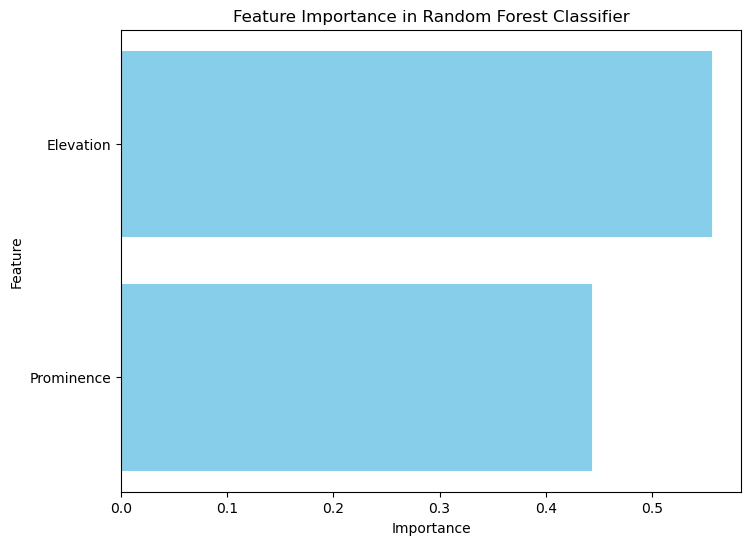

In [87]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_clf.feature_importances_
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()


Here we can see that Elevation surpasses Prominence in terms of importance, but both are over 0.4.

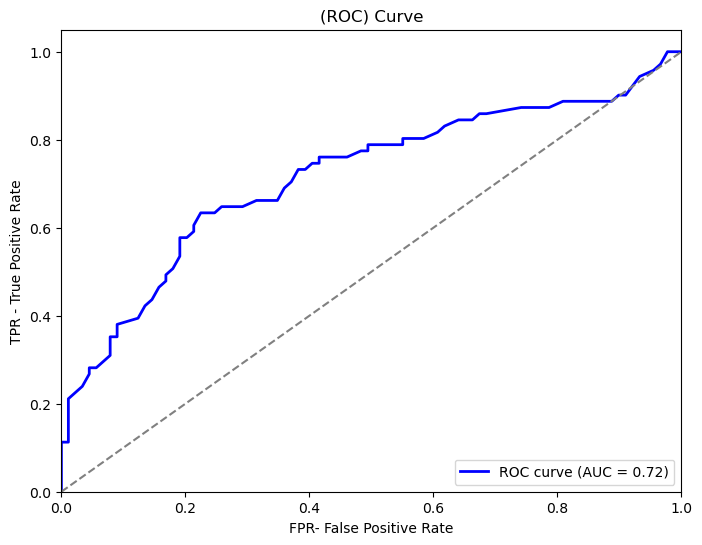

In [88]:
y_train_binary = y_train.apply(lambda x: 1 if x == 'High' else 0)
y_test_binary = y_test.apply(lambda x: 1 if x == 'High' else 0)


rf_clf_binary = RandomForestClassifier(random_state=42)
rf_clf_binary.fit(X_train, y_train_binary)

y_proba = rf_clf_binary.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test_binary, y_proba)

roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for a random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR- False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Conclusion

The main goal of this project was to figure out how popular a mountain peak might be based on its elevation and prominence. To do this, I used two different machine learning models (1) Logistic Regression and (2) Random Forest and multiple variations of each. Logistic Regression was a good starting point, but Random Forest ended up doing a better job at predicting which peaks would be more or less popular.  However, whenever I dropped the Medium value the Logitsitic Regression model did a better job.  This was a fun project and I learned a lot about the data and the models.  I hope you enjoyed reading it as much as I enjoyed writing it.

One of the challenges encountered was that the data likely has some underlying factors that are not captured simply by the features listed.  For example, it's possible that certain peaks are more popular just because they're more well known or easier to get to.

The results of this project have some practical uses for hikers/climbers (me) in that I can use this model to determine which peaks I might want to hike based on their popularity.  I can also use this model to determine which peaks I might want to avoid if I want to avoid the crowds!

In the future I'd like to leverage some more feature engineering and adding some additional features to the model to see if I can get a better result.  I'd also like to scrape some more data like hiking miles/time to try to solve similar problems that may have a different outcome (and may be more relevant to more people).

Hope you enjoyed it!